### IMPORTING LIBARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### IMPORTING DATASET

In [6]:
power=pd.read_csv("Plant_1_Generation_Data.csv")
sensor=pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

### DATA PREPROCESSING

In [8]:
power=power.dropna()
sensor=sensor.dropna()
sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [10]:
power.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [12]:
power['DATE_TIME'] = pd.to_datetime(power['DATE_TIME'],format = '%d-%m-%Y %H:%M')


In [14]:
sensor['DATE_TIME'] = pd.to_datetime(sensor['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')


In [16]:
sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [18]:
power = pd.merge(power.drop(columns = ['PLANT_ID']), sensor.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [20]:
power['DATE_TIME'] = pd.to_datetime(power['DATE_TIME'])
power['YEAR'] = power['DATE_TIME'].dt.year
power['MONTH'] = power['DATE_TIME'].dt.month
power['DAY'] = power['DATE_TIME'].dt.day
power['HOUR'] = power['DATE_TIME'].dt.hour
power['MINUTES'] = power['DATE_TIME'].dt.minute
power['MINUTES_PASS'] = power['HOUR'] * 60 + power['MINUTES']

In [22]:

unique_elements = power["SOURCE_KEY"].unique()
print("Unique Elements:", unique_elements)
power["SOURCE_KEY"], unique_labels = pd.factorize(power["SOURCE_KEY"])
print("\nDataFrame with Numeric Labels:")
print(power)

Unique Elements: ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']

DataFrame with Numeric Labels:
                DATE_TIME  SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00           0       0.0       0.0        0.000   
1     2020-05-15 00:00:00           1       0.0       0.0        0.000   
2     2020-05-15 00:00:00           2       0.0       0.0        0.000   
3     2020-05-15 00:00:00           3       0.0       0.0        0.000   
4     2020-05-15 00:00:00           4       0.0       0.0        0.000   
...                   ...         ...       ...       ...          ...   
68769 2020-06-17 23:45:00     

## AC POWER VS TIME ##

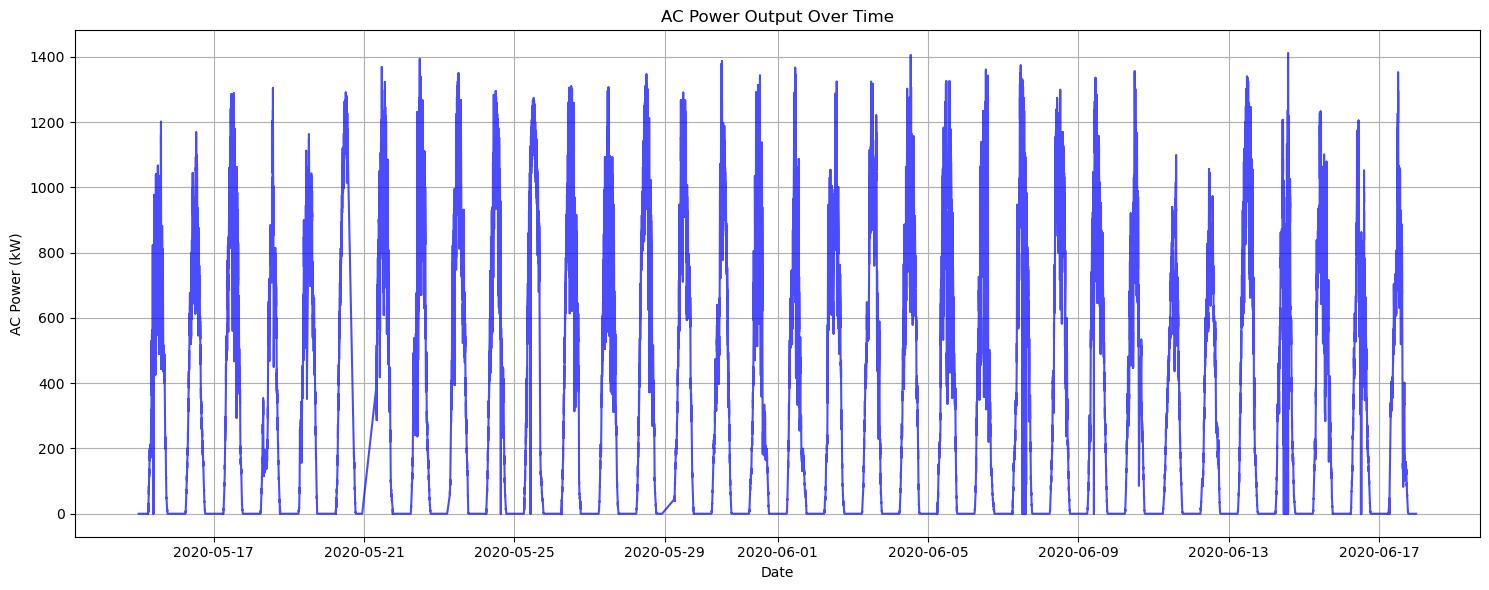

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
plt.plot(power['DATE_TIME'], power['AC_POWER'], color='blue', alpha=0.7)
plt.title('AC Power Output Over Time')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()

## TEMPERATURE TRENDS COMPARISON ##

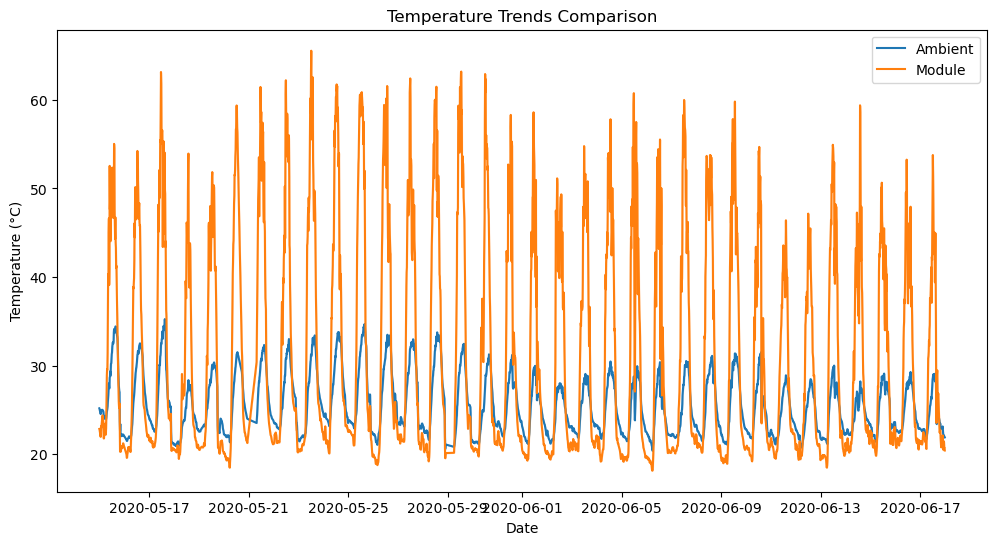

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=power['DATE_TIME'], y=power['AMBIENT_TEMPERATURE'], label='Ambient')
sns.lineplot(x=power['DATE_TIME'], y=power['MODULE_TEMPERATURE'], label='Module')
plt.title('Temperature Trends Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()



In [27]:
power=power[['SOURCE_KEY','AMBIENT_TEMPERATURE','AC_POWER','MODULE_TEMPERATURE','IRRADIATION','YEAR','MONTH','DAY','HOUR','MINUTES','MINUTES_PASS']]
power.head()

,SOURCE_KEY,AMBIENT_TEMPERATURE,AC_POWER,MODULE_TEMPERATURE,IRRADIATION,YEAR,MONTH,DAY,HOUR,MINUTES,MINUTES_PASS
0,0,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
1,1,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
2,2,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
3,3,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
4,4,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0


In [29]:
X=power[['SOURCE_KEY','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','YEAR','MONTH','DAY','HOUR','MINUTES','MINUTES_PASS']]

In [31]:
X.head()
print(power['AC_POWER'].max())
print(power.iloc[5700])

1410.95
SOURCE_KEY                7.000000
AMBIENT_TEMPERATURE      25.290240
AC_POWER                  0.000000
MODULE_TEMPERATURE       23.789335
IRRADIATION               0.000000
YEAR                   2020.000000
MONTH                     5.000000
DAY                      17.000000
HOUR                     20.000000
MINUTES                  30.000000
MINUTES_PASS           1230.000000
Name: 5700, dtype: float64


In [33]:
Y=power[["AC_POWER"]]

### SPLITTING THE DATASET

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)

(55019, 10)


### XG BOOST

In [39]:
import xgboost as xgb
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1)
# Train the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
R2_Score = round(r2_score(Y_pred,Y_test) * 100, 2)
MAE_rfr = mean_absolute_error(Y_pred,Y_test)
print(f"Mean Squared Error: {mse}")
print("MAE : ",MAE_rfr,"")
print("R2 Score : ",R2_Score,"%")

Mean Squared Error: 1486.496719880023
MAE :  13.873684881058821 
R2 Score :  99.03 %


### RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,Y_test) * 100, 2)
MAE_rfr = mean_absolute_error(y_pred_rfr, Y_test)
MSE=mean_squared_error(y_pred_rfr, Y_test)
print(f"Mean Squared Error: {MSE}")
print("R2 Score : ",R2_Score_rfr,"%")
print("MAE : ",MAE_rfr,"")

C:\Users\djivi\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 1867.748573895479
R2 Score :  98.78 %
MAE :  14.31179536833579 


In [46]:
prediction_rfr = rfr.predict(X_test)
print(prediction_rfr)

[975.69894643   0.           0.         ...   0.           0.
 335.55994642]


In [48]:
print(Y_test)

          AC_POWER
22173   984.787500
15244     0.000000
37426     0.000000
5254    709.862500
3194    343.300000
...            ...
40618  1022.500000
36847     4.957143
51553     0.000000
31        0.000000
12538   337.328571

[13755 rows x 1 columns]


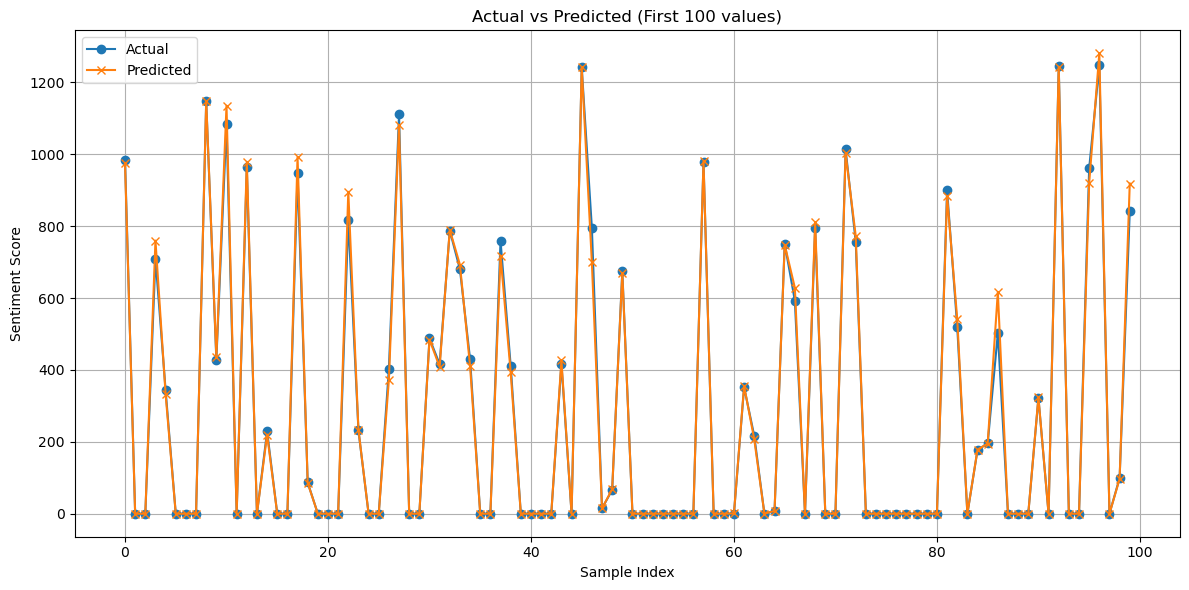

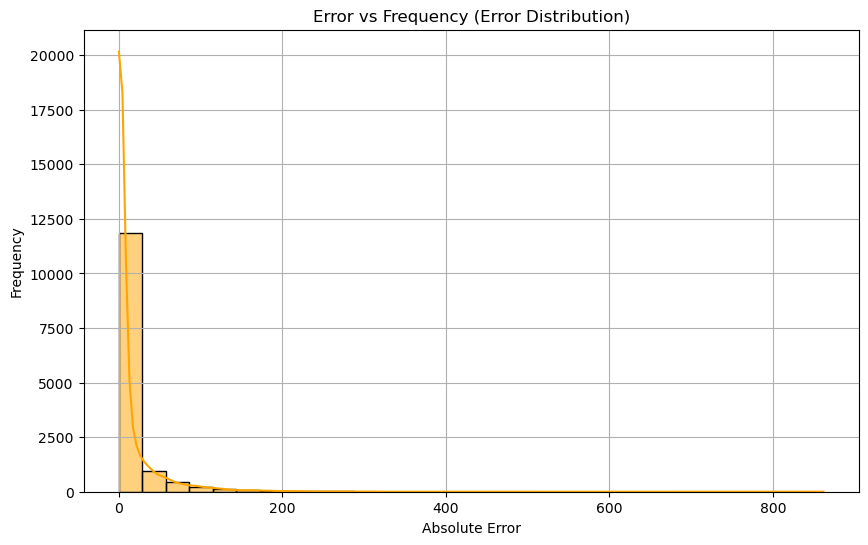

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Flatten Y_test for consistency
Y_test_flat = Y_test_flat = Y_test.values.ravel()


# 1. Line Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(Y_test_flat[:100], label='Actual', marker='o')
plt.plot(y_pred_rfr[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 100 values)')
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

errors = np.abs(Y_test.values.ravel() - Y_pred.ravel())



# Plot the histogram of errors
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Error vs Frequency (Error Distribution)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



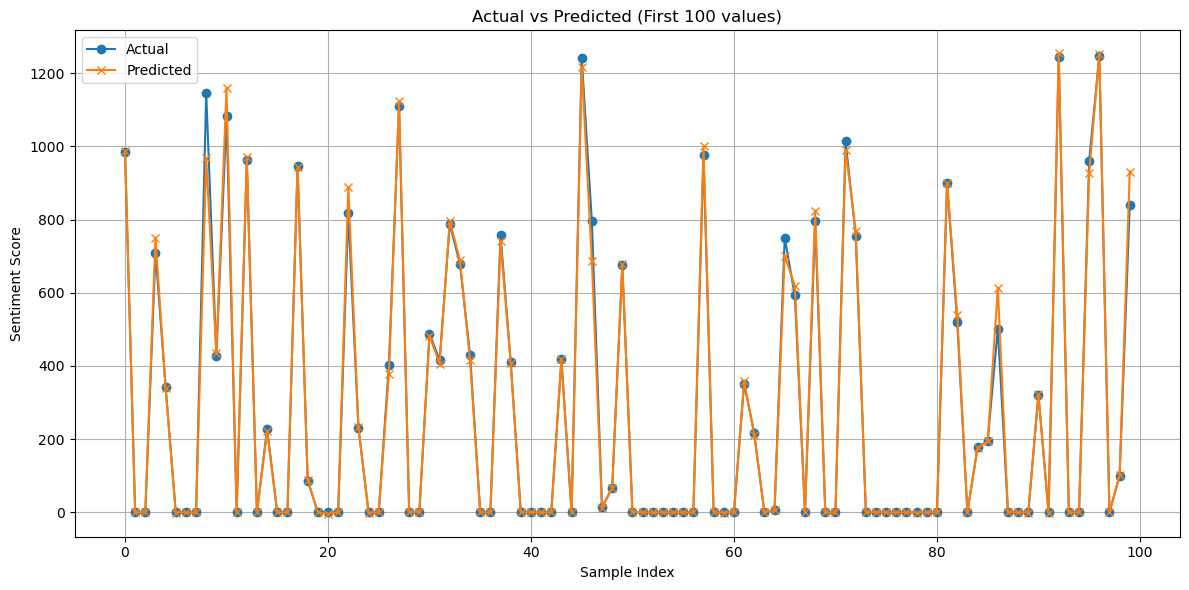

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Flatten Y_test for consistency
Y_test_flat = Y_test_flat = Y_test.values.ravel()


# 1. Line Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(Y_test_flat[:100], label='Actual', marker='o')
plt.plot(Y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 100 values)')
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### LSTM

In [66]:
print(power.columns)


Index(['SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'AC_POWER', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES',
       'MINUTES_PASS'],
      dtype='object')


In [64]:
power_numeric = power.select_dtypes(include=['number'])
# Apply MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(power_numeric)
# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=power_numeric.columns)
# Get target column index
target_column = normalized_df.columns.get_loc("AC_POWER")
print(target_column)

2


In [66]:
def create_sequences(data, target_column, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data.iloc[i+seq_length, target_column])
    return np.array(X), np.array(y)
seq_length = 10 
X, y = create_sequences(normalized_df, target_column=2, seq_length=seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

C:\Users\djivi\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 2/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 3/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 11/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 12

In [68]:
y_pred = model.predict(X_test)

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [70]:

y_test_reshaped = y_test.reshape(-1, 1)
combined = np.hstack((y_test_reshaped, y_pred))
comparison_df = pd.DataFrame(combined, columns=["Actual Values", "Predicted Values"])
print(comparison_df)


       Actual Values  Predicted Values
0           0.493629          0.473022
1           0.498955          0.468876
2           0.502587          0.468313
3           0.505448          0.463746
4           0.548121          0.518857
...              ...               ...
13748       0.000000          0.007396
13749       0.000000          0.007545
13750       0.000000          0.007539
13751       0.000000          0.007541
13752       0.000000          0.007550

[13753 rows x 2 columns]


In [72]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assuming y_scaler was fit on the target column (AC_POWER) of the original data
# Now you should only inverse transform the 'AC_POWER' column.

# ----- STEP 1: Reshape test predictions and actual values -----
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

# ----- STEP 2: Inverse transform (unscale) using the same scaler used during training -----
# Since the scaler was fitted on the entire dataset, we need to create a matrix with the same number of features.
# For example, creating a matrix with dummy values for the features that are not the target column (AC_POWER).
# Here we assume 'normalized_df' has been previously created from the original data.

# Create dummy columns (keeping the same number of columns as when scaling)
dummy_columns = np.zeros((y_test_reshaped.shape[0], normalized_df.shape[1] - 1))  # All zeros except the target column

# Concatenate the reshaped target column with dummy columns
full_test_data = np.hstack((dummy_columns, y_test_reshaped))  # Add the target column at the end

# Apply inverse transformation to the whole data
full_test_unscaled = scaler.inverse_transform(full_test_data)

# The target column is the last column in the dataset
y_test_unscaled = full_test_unscaled[:, -1].reshape(-1, 1)

# Similarly, apply inverse transformation to the predicted values
full_pred_data = np.hstack((dummy_columns, y_pred_reshaped))  # Add the target column at the end
full_pred_unscaled = scaler.inverse_transform(full_pred_data)
y_pred_unscaled = full_pred_unscaled[:, -1].reshape(-1, 1)

# ----- STEP 3: Compare actual vs predicted -----
comparison_df = pd.DataFrame(
    np.hstack((y_test_unscaled, y_pred_unscaled)),
    columns=["Actual Values", "Predicted Values"]
)
print("\n Actual vs Predicted (Sample):")
print(comparison_df.head(10))

# ----- STEP 4: Evaluation Metrics -----
R2_Score = round(r2_score(y_test_unscaled, y_pred_unscaled) * 100, 2)
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
MSE = mean_squared_error(y_test_unscaled, y_pred_unscaled)

# ----- STEP 5: Print metrics -----
print("\n Evaluation Metrics:")
print(f" R² Score  : {R2_Score} %")
print(f" MAE       : {MAE:.4f}")
print(f" MSE       : {MSE:.4f}")






 Actual vs Predicted (Sample):
   Actual Values  Predicted Values
0     703.421201        674.056964
1     711.010312        668.148561
2     716.186346        667.345697
3     720.264051        660.838448
4     781.072530        739.371568
5     781.822784        723.892549
6     762.568659        702.791872
7     788.878061        735.324848
8     781.517993        716.929445
9     769.458015        711.496092

 Evaluation Metrics:
 R² Score  : 96.95 %
 MAE       : 31.4047
 MSE       : 4168.9350


## ACTUAL AC POWER VS PREDICTED AC POWER ##

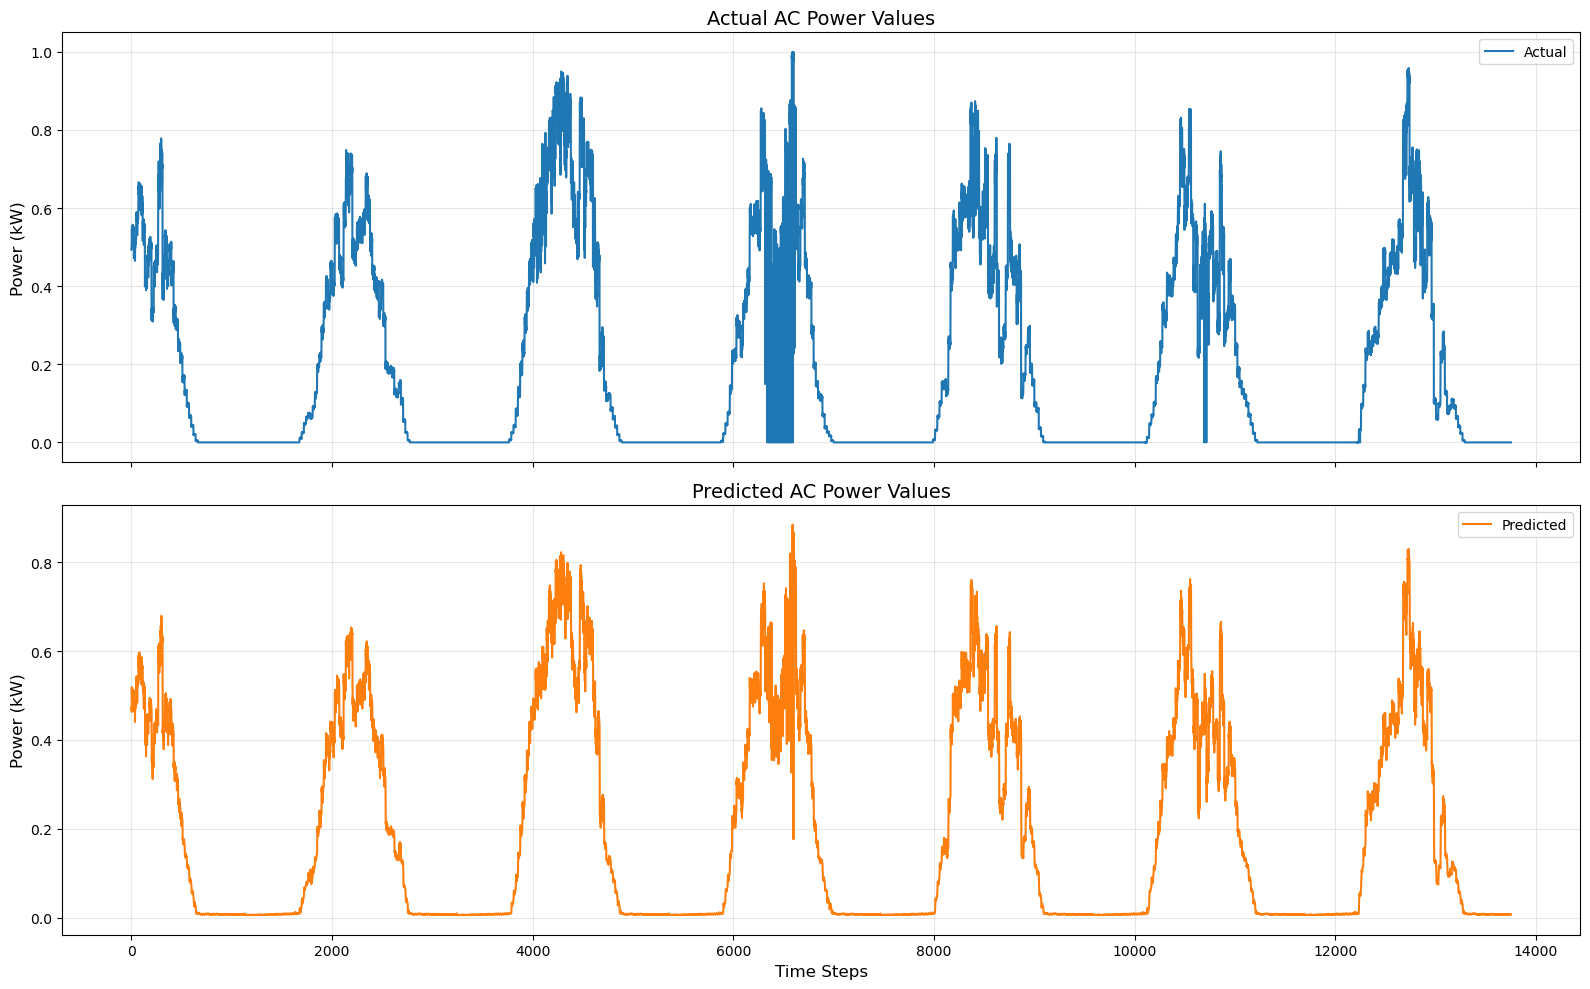

In [76]:


# Create time axis from test set indices
time_steps = np.arange(len(y_test_reshaped))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Actual Values Plot
ax1.plot(time_steps, y_test_reshaped, color='#1f77b4', label='Actual')
ax1.set_title('Actual AC Power Values', fontsize=14)
ax1.set_ylabel('Power (kW)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Predicted Values Plot
ax2.plot(time_steps, y_pred, color='#ff7f0e', label='Predicted')
ax2.set_title('Predicted AC Power Values', fontsize=14)
ax2.set_xlabel('Time Steps', fontsize=12)
ax2.set_ylabel('Power (kW)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

### INPUT FROM USER


In [45]:
def predict_from_input():
    feature_names = ['SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 
                     'IRRADIATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'MINUTES_PASS']    
    user_input = {}
    for feature in feature_names:
        user_input[feature] = float(input(f"Enter value for {feature}: "))
    user_input_df = pd.DataFrame([user_input])
    predicted_output = rfr.predict(user_input_df)
    print(f"\nPredicted AC Power Output: {predicted_output} kW")
predict_from_input()





KeyboardInterrupt: Interrupted by user

In [47]:
import pickle
with open("solar_model.pkl", "wb") as model_file:
    pickle.dump(rfr, model_file)

print("✅ Model saved successfully as solar_model.pkl")

✅ Model saved successfully as solar_model.pkl
